## Machine Learning - Ex.1


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

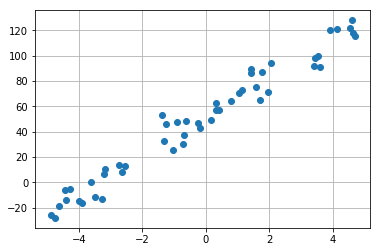

In [2]:
# generate the training data:

N = 50
x = np.random.random(N)*10-5
e = np.random.randn(N)*10
y = 15*x + 50 + e

plt.plot(x,y,'o')
plt.grid()
plt.show()

### Cost function visualization

The cost function $J(w_0,w_1)$ is defined as follows,

$$J(w_0,w_1)=\frac{1}{N}\sum_{i=1}^{N}{( w_0+w_1 x_i - y_i) ^2 }$$

Calculate $J(w_0,w_1)$ for the following parameters space:

$$ w_0 \in (0,100), w_1 \in (0,30)$$

Use a contour plot to visualize the result.


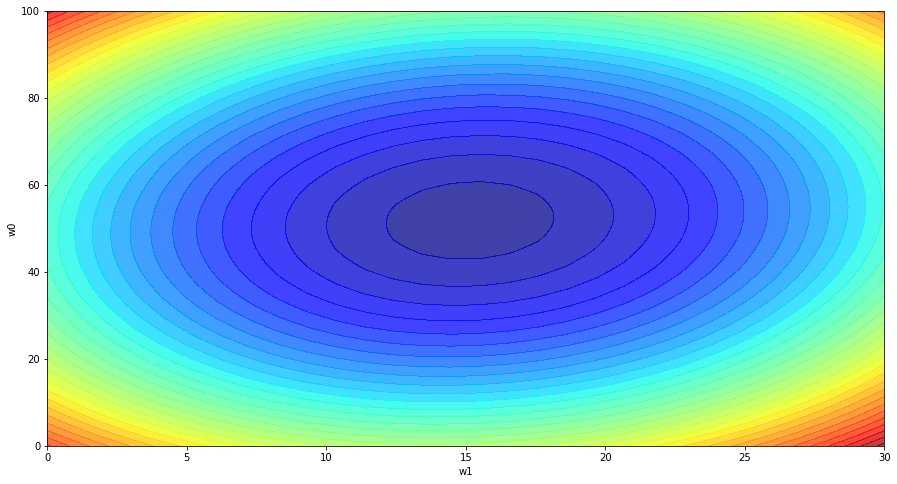

In [3]:
def J(w0,w1):
    result = 0.00
    for i in range(N):
        result += (w0 + w1*x[i]-y[i])**2
    result *= 1/N
    return result

xspace = np.linspace(0,30,30)
yspace = np.linspace(0,100,100)
X,Y = np.meshgrid(xspace,yspace)
plt.figure(figsize=(15,8))
plt.xlabel('w1')
plt.ylabel('w0')
plt.contourf(X, Y, J(Y,X), 40, alpha=.75, cmap='jet')
#plt.contour(X, Y, J(Y,X), 40, colors='black',linewidth=.5)
plt.show()

### Gradient Descent

Implement the gradient descent algorithm find the parameters $(w_0,w_1)$ that minimize the cost function.

Start from $w^{(0)}_0=0,w^{(0)}_1=0$ and iterate the algorithm for $T=100$ steps (or more if needed).

Verify that algorithm indeed converged by plotting the cost function $J(w^{(t)}_0,w^{(t)}_1)$ as a function of iteration $t=0,1,..,T$.

In addition plot the value of each of the parameters as a function of iteration: $w^{(t)}_0$ and $w^{(t)}_1$.

Use subplots to plot all 3 plots in a single figure.

 

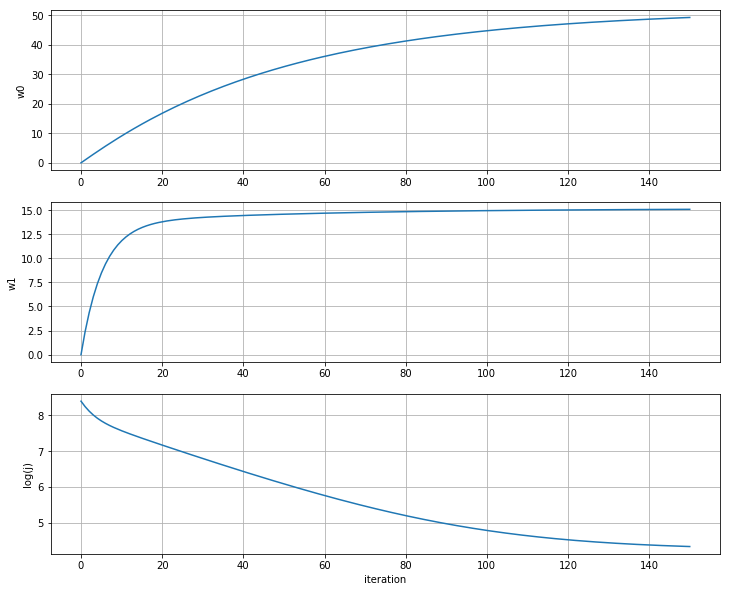

In [4]:
def Jw0(w0,w1):
    j=0
    for i in range(N):
        j+=((w0+w1*x[i])-y[i])
    j*=2/N    
    return j

def Jw1(w0,w1):
    j=0
    for i in range(N):
        j+= (((w0+(w1*x[i]))-y[i])*x[i])
    j*=2/N    
    return j 
def gradientDesc(run,alpha):
    w0items = []
    w1items = []
    xt_0 = 0
    xt_1 = 0
    for i in run:
        w0items += [xt_0]
        w1items += [xt_1]
        xt_0, xt_1 = (xt_0 -alpha*Jw0(xt_0,xt_1),xt_1 -alpha*Jw1(xt_0,xt_1))
    return w0items,w1items

T = 150
run = np.linspace(0,T,T)
courseW0,courseW1 = gradientDesc(run,0.01)
plt.figure(figsize=(12,10))
plt.subplot(3,1,1)
plt.ylabel('w0')
plt.grid()
plt.plot(run,courseW0)

plt.subplot(3,1,2)
plt.ylabel('w1')
plt.grid()
plt.plot(run,courseW1)

plt.subplot(3,1,3)
itemsForJ = []
for i in range(T):
    itemsForJ += [np.log(J(courseW0[i],courseW1[i]))]
plt.xlabel('iteration')
plt.ylabel('log(j)')
plt.grid()

plt.plot(run,itemsForJ)
plt.show()


### Visualize the path of the algorithm

Each iteration $t=1,..,T$ of the algorithm, results in a combination of the parameters: $w^{(t)}_0$ and $w^{(t)}_1$.

These combinations can be shown as a series of points in the parameters space $(w_0,w_1)$.

Plot again the cost function $J(w_0,w_1)$ and add on top of it, the series of points created by the algorithm. Verify that it indeed converged to the minimum of the cost function.

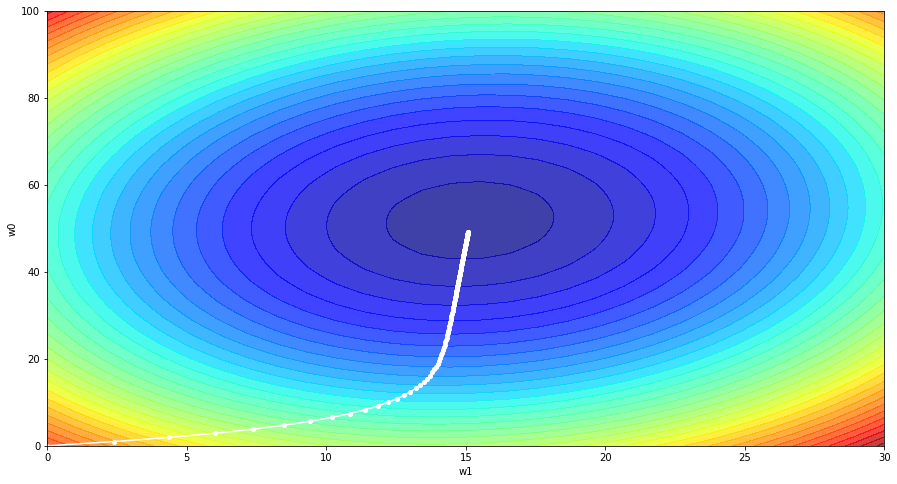

In [5]:
plt.figure(figsize=(15,8))
plt.xlabel('w1')
plt.ylabel('w0')
plt.contourf(X, Y, J(Y,X), 40, alpha=.75, cmap='jet')
#plt.contour(X, Y, J(Y,X), 40, colors='black', linewidth=.5)
plt.plot(courseW1,courseW0,'.-',markersize=8,color='white')
plt.show()

### Linear regression

The gradient descent should have converged to linear regression solution:

$$ f(x) = w_0 + w_1 x$$

Plot the training data and add to the plot the linear function: $y=f(x)$. Verify that the result makes sense.

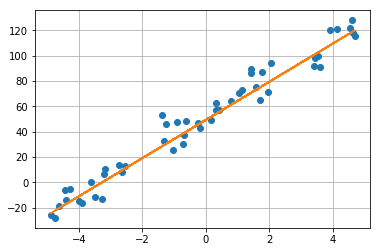

In [6]:
def f(x):
    return courseW0[T-1] + courseW1[T-1]*x
plt.plot(x,y,'o')
plt.plot(x,f(x))
plt.grid()
plt.show()

## Good luck !